In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
import os
root_path = 'gdrive/My Drive/HateXplain/'
os.chdir(root_path)

Mounted at /content/gdrive


In [2]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 8})

In [3]:
import pickle
with open('data_dict_random_ratio.pkl', 'rb') as f:
    data_dict = pickle.load(f)

In [4]:
data_dict

{0: {0: {89: {'acc': 0.6058894715611134, 'f1': 0.48261655876313364},
   571: {'acc': 0.6058894715611134, 'f1': 0.48261655876313364},
   766: {'acc': 0.6058894715611134, 'f1': 0.48261655876313364},
   994: {'acc': 0.6058894715611134, 'f1': 0.48261655876313364},
   1009: {'acc': 0.6058894715611134, 'f1': 0.48261655876313364}},
  20: {89: {'acc': 0.7777329568374345, 'f1': 0.5666394432963956},
   571: {'acc': 0.7773295683743445, 'f1': 0.5653898470963834},
   766: {'acc': 0.7765227914481646, 'f1': 0.5662305683142136},
   994: {'acc': 0.7793465106897943, 'f1': 0.5672241509947215},
   1009: {'acc': 0.7773295683743445, 'f1': 0.5656617844323315}},
  50: {89: {'acc': 0.7987091569181122, 'f1': 0.5649592589098643},
   571: {'acc': 0.7991125453812021, 'f1': 0.5624090716917476},
   766: {'acc': 0.800726099233562, 'f1': 0.5624688061203651},
   994: {'acc': 0.8039532069382815, 'f1': 0.5619806699307892},
   1009: {'acc': 0.800726099233562, 'f1': 0.5652408091981878}},
  100: {89: {'acc': 0.8124243646631

In [ ]:
try:
    with open('data_dict.pkl', 'rb') as f:
        data_dict1 = pickle.load(f)
except:
    data_dict1 = {}
    with open('data_dict.pkl', 'wb') as f:
        pickle.dump(data_dic1t, f)

In [ ]:
data_dict1

{0: {0: {'acc': 0.6058894715611134, 'f1': 0.48261655876313364},
  20: {'acc': 0.7115772488906817, 'f1': 0.575760695283194},
  50: {'acc': 0.7438483259378782, 'f1': 0.6203703202731116},
  100: {'acc': 0.7591770875352964, 'f1': 0.6428216820581628},
  200: {'acc': 0.7833803953206938, 'f1': 0.6681883175190375},
  300: {'acc': 0.7668414683340057, 'f1': 0.6587040372126057},
  400: {'acc': 0.7563533682936668, 'f1': 0.6577470742784487},
  500: {'acc': 0.7672448567970956, 'f1': 0.6685362955573013}},
 100: {0: {'acc': 0.627672448567971, 'f1': 0.4957829435842558},
  20: {'acc': 0.7394110528438886, 'f1': 0.6170929557272137},
  50: {'acc': 0.7853973376361436, 'f1': 0.6610425669946965},
  100: {'acc': 0.7825736183945139, 'f1': 0.6677706414006774},
  200: {'acc': 0.7962888261395724, 'f1': 0.6828959613154746},
  300: {'acc': 0.8152480839048003, 'f1': 0.7003294403677467},
  400: {'acc': 0.8031464300121016, 'f1': 0.6921868156435186},
  500: {'acc': 0.7833803953206938, 'f1': 0.6810928138127122}}}

In [5]:
master_dict = {}
for x in data_dict.keys():
    master_dict[x] = data_dict[x]
# for y in data_dict1.keys():
#     master_dict[y] = data_dict1[y]

In [ ]:
master_dict

In [ ]:
try:
    with open('master_dict.pkl', 'rb') as f:
        master_dict = pickle.load(f)
except:
    data_dict = {}
    with open('master_dict.pkl', 'wb') as f:
        pickle.dump(master_dict, f)

In [ ]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

In [7]:
ml_dict = {}
try:
    with open('data_dict_ml.pkl', 'rb') as f:
        ml_dict = pickle.load(f)
except:
    print('fail')

In [8]:
for shot in ml_dict:
    for seed in ml_dict[shot]:
        if seed == 42:
            print(shot)
            print(ml_dict[shot][seed])

20
{'f1': 0.5088011404710691, 'acc': 0.6643807987091569}
50
{'f1': 0.6143157465641742, 'acc': 0.772892295280355}
100
{'f1': 0.6359167967450277, 'acc': 0.7797498991528842}
200
{'f1': 0.651611520470984, 'acc': 0.7785397337636144}
300
{'f1': 0.6444444109161646, 'acc': 0.7708753529649052}
400
{'f1': 0.6581075595651232, 'acc': 0.7793465106897943}
500
{'f1': 0.6676813248513135, 'acc': 0.7890278338039532}


0.6620293809681679
0.6697333752530388
0.6701034698767885
0.6792332280106247
0.6747000490254462
0.6806781483343463
0.6892980416199206
0.6579381459744643


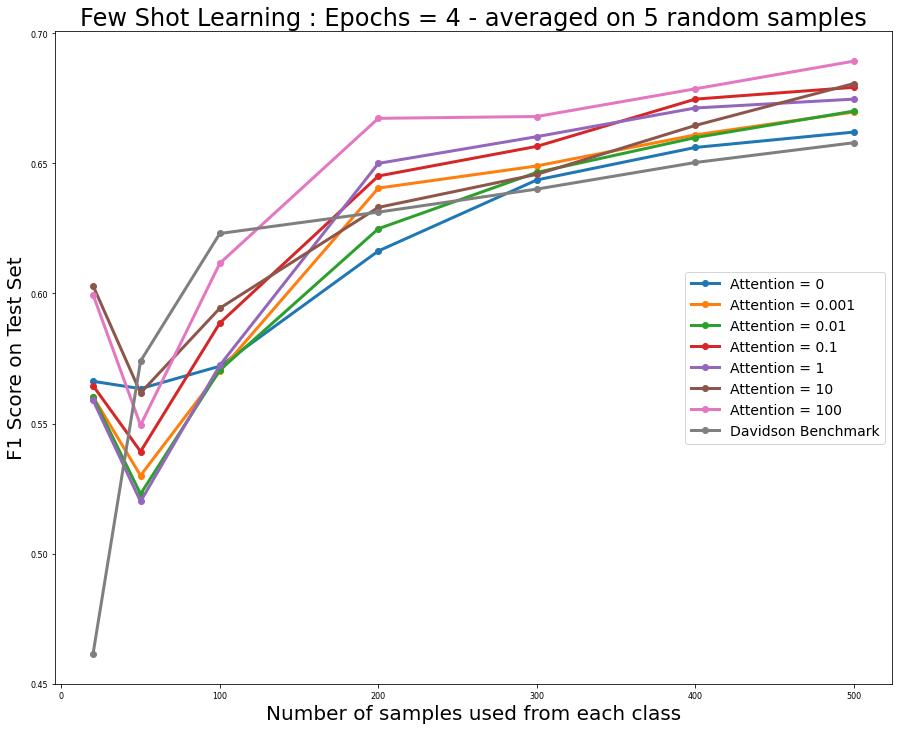

In [10]:
shots = [20, 50, 100, 200, 300, 400, 500]
scores = {}
for attn, results in master_dict.items():
    if attn not in scores: scores[attn] = []
    for shot in shots:
        score = 0
        for seed in results[shot].keys():
            score += results[shot][seed]['f1']
        score /= 5
        scores[attn].append(score)
        if shot == 500:
            print(score)    
attentions = [0, 0.001, 0.01, 0.1, 1, 10, 100]
# attentions = [0, 0.01,  1, 100]
for attn in attentions:
    plt.plot(shots, scores[attn], '-o',linewidth=3,label = 'Attention = {}'.format(attn))
scores['ml'] = []
for shot in shots:
    score = 0
    for seed in ml_dict[shot].keys():
        if seed == 42: continue
        score += ml_dict[shot][seed]['f1']
    score /= 5
    if shot == 500:
        print(score)
    scores['ml'].append(score)
plt.plot(shots, scores['ml'], '-o',linewidth=3,label = 'Davidson Benchmark')
plt.legend(loc = 'center right', fontsize = 14)
plt.xlabel('Number of samples used from each class', fontsize = 20)
plt.ylabel('F1 Score on Test Set', fontsize = 20)
plt.title('Few Shot Learning : Epochs = 4 - averaged on 5 random samples', fontsize = 24)
plt.show()

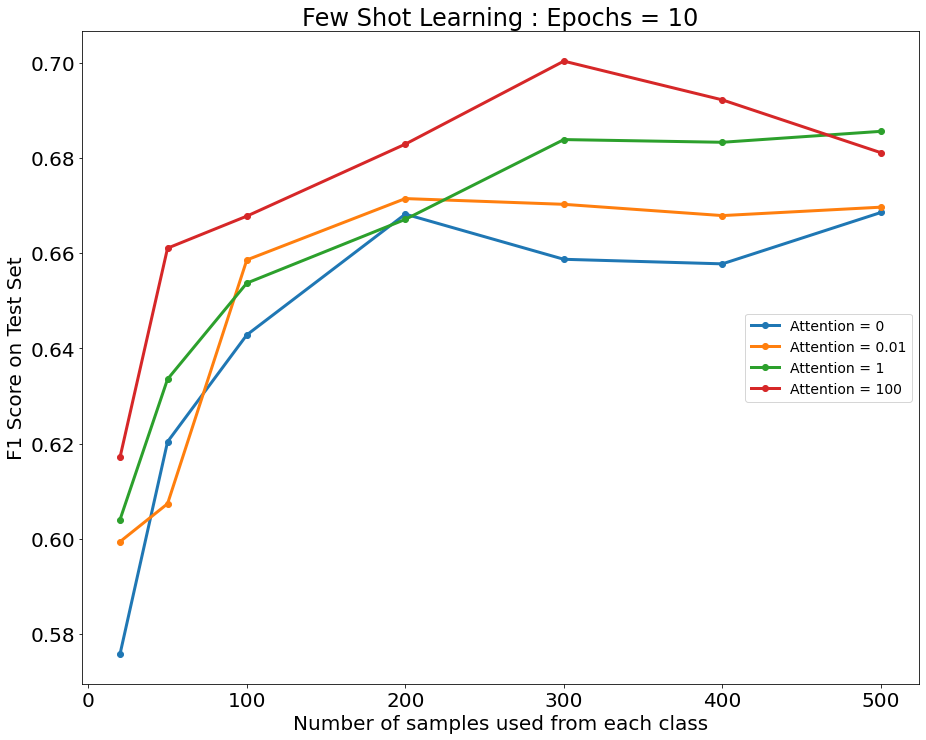

In [ ]:
shots = [20, 50, 100, 200, 300, 400, 500]
scores = {}
for attn, results in master_dict.items():
    if attn not in scores: scores[attn] = []
    for shot in shots:
        scores[attn].append(results[shot]['f1'])
attentions = [0, 0.001, 0.01, 0.1, 1, 10, 100]
attentions = [0, 0.01,  1, 100]
for attn in attentions:
    plt.plot(shots, scores[attn], '-o',linewidth=3,label = 'Attention = {}'.format(attn))
plt.legend(loc = 'center right', fontsize = 14)
plt.xlabel('Number of samples used from each class', fontsize = 20)
plt.ylabel('F1 Score on Test Set', fontsize = 20)
plt.title('Few Shot Learning : Epochs = 10', fontsize = 24)
plt.show()

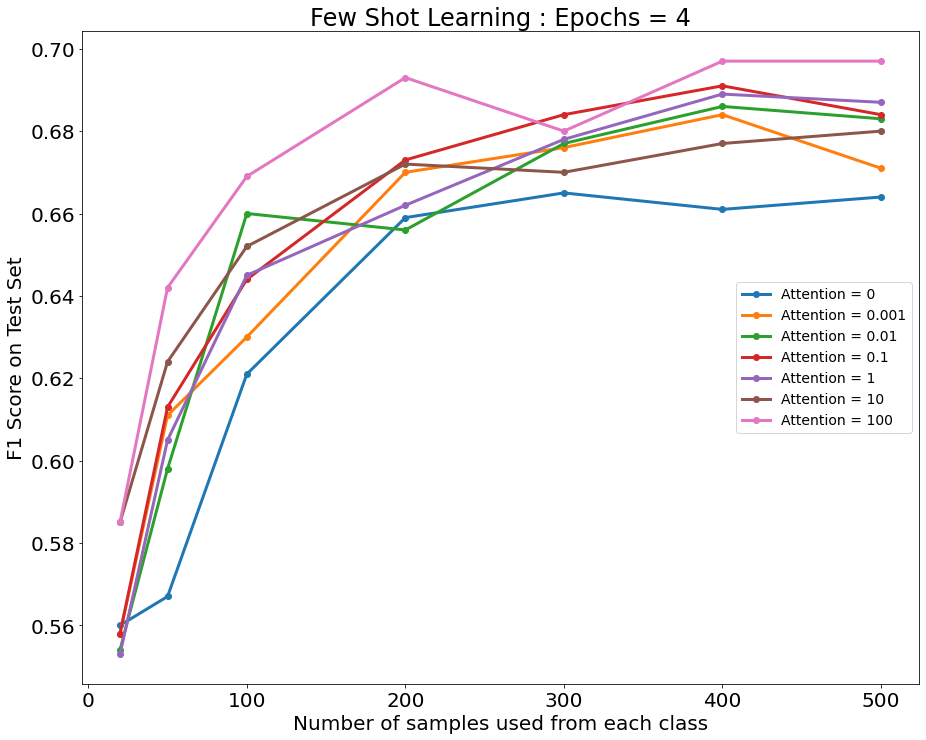

In [ ]:
ots = [20, 50, 100, 200, 300, 400, 500]
scores = {}
# for attn, results in master_dict.items():
#     if attn not in scores: scores[attn] = []
#     for shot in shots:
#         scores[attn].append(results[shot]['f1'])
scores[0] = [0.560, 0.567, 0.621, 0.659, 0.665, 0.661, 0.664]
scores[0.001] = [0.558, 0.611, 0.630, 0.670, 0.676, 0.684, 0.671]
scores[0.01] = [0.554, 0.598, 0.660, 0.656, 0.677, 0.686, 0.683]
scores[0.1] = [0.558, 0.613, 0.644, 0.673, 0.684, 0.691, 0.684]
scores[1] = [0.553, 0.605, 0.645, 0.662, 0.678, 0.689, 0.687]
scores[10] = [0.585, 0.624, 0.652, 0.672, 0.670, 0.677, 0.680]
scores[100] = [0.585, 0.642, 0.669, 0.693, 0.680, 0.697, 0.697]
attentions = [0, 0.001, 0.01, 0.1, 1, 10, 100]
# attentions = [0, 0.01,  1, 100]
for attn in attentions:
    plt.plot(shots, scores[attn], '-o',linewidth=3,label = 'Attention = {}'.format(attn))
plt.legend(loc = 'center right', fontsize = 14)
plt.xlabel('Number of samples used from each class', fontsize = 20)
plt.ylabel('F1 Score on Test Set', fontsize = 20)
plt.title('Few Shot Learning : Epochs = 4', fontsize = 24)
plt.show()